In [1]:
import plotly.express as px
from plotly import graph_objs as go
import openpyxl

In [2]:
import pandas as pd
lodge=pd.read_csv("lodgedata.csv")
lodge.head(3)

,hotel,is_canceled,lead_time,Year,Month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Nights,Revenue
0,Resort Hotel,0,7,2015,July,27,1,0,4,2,...,NaN,0,Transient,153.00,0,1,Check-Out,05/07/2015,4,612.00
1,Resort Hotel,0,37,2015,July,27,1,1,4,1,...,NaN,0,Transient,97.29,0,1,Check-Out,06/07/2015,5,486.45
2,Resort Hotel,0,99,2015,July,27,3,3,7,2,...,NaN,0,Contract,111.15,0,0,Check-Out,13/07/2015,10,1111.50


In [46]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
lodge['Month'] = pd.Categorical(lodge['Month'], categories=months, ordered=True)
lodgeg=lodge.sort_values(['Category','Month']).groupby(['Category','Month'])

In [58]:
lodgeg['Revenue'].sum()



Category  Month    
Double    January        5309.24
          February       9197.92
          March         13047.29
          April         20674.37
          May           23816.63
          June          22671.37
          July          34535.64
          August        35989.01
          September     17592.96
          October       16807.09
          November       3395.47
          December       6029.02
Family    January         459.30
          February       1467.80
          March          2221.97
          April          1238.42
          May            8223.80
          June          12353.26
          July           8877.06
          August        11441.32
          September      3452.25
          October        5042.97
          November        602.00
          December       1572.99
Luxury    January       14176.90
          February      29564.93
          March         26879.42
          April         59626.43
          May           83548.08
          June         

In [7]:
one_year =pd.read_csv("Month_revenue_2021.csv")

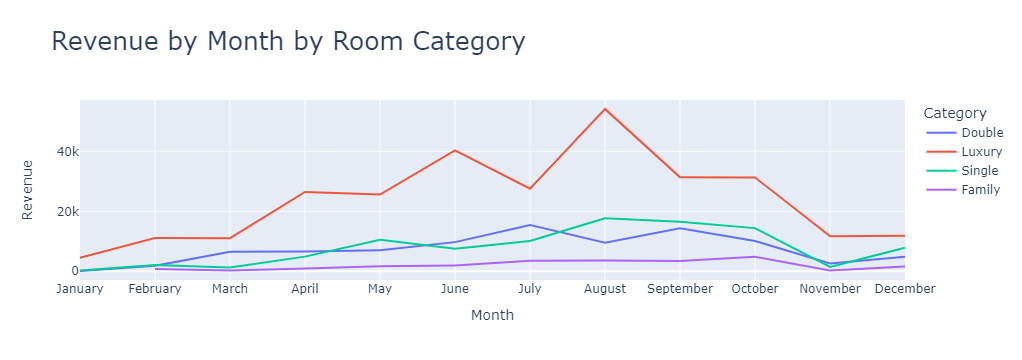

In [52]:
fig = px.line(one_year, x='Month', y='Revenue', color='Category', title="Revenue by Month by Room Category")
fig.update_layout(title_font_size=25)
fig.show()

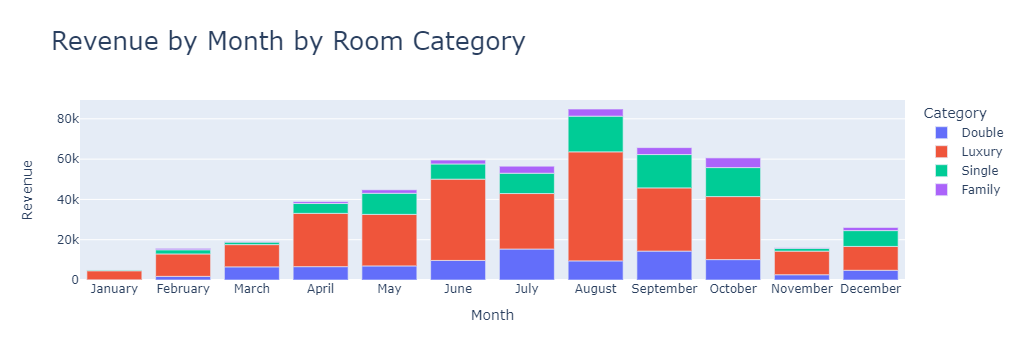

In [12]:
fig2 = px.bar(one_year, x='Month', y='Revenue', color='Category', title="Revenue by Month by Room Category")
fig2.update_layout(title_font_size=25)
fig2.show()

In [14]:
week =pd.read_csv("week_revenue.csv")

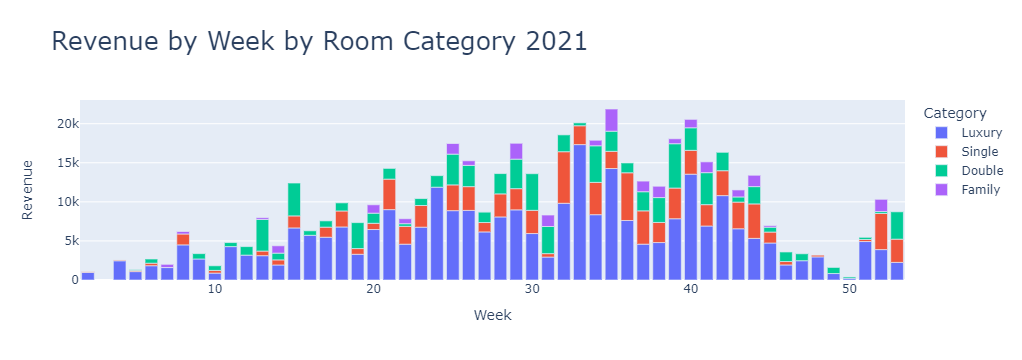

In [15]:
fig3 = px.bar(week, x='Week', y='Revenue', color='Category', title = 'Revenue by Week by Room Category 2021')
fig3.update_layout(title_font_size=25)
fig3.show()

In [16]:
from datetime import datetime
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
day = pd.read_excel('lodgedata.xlsx', sheet_name='day', parse_dates=['Date'], date_parser=dateparse)


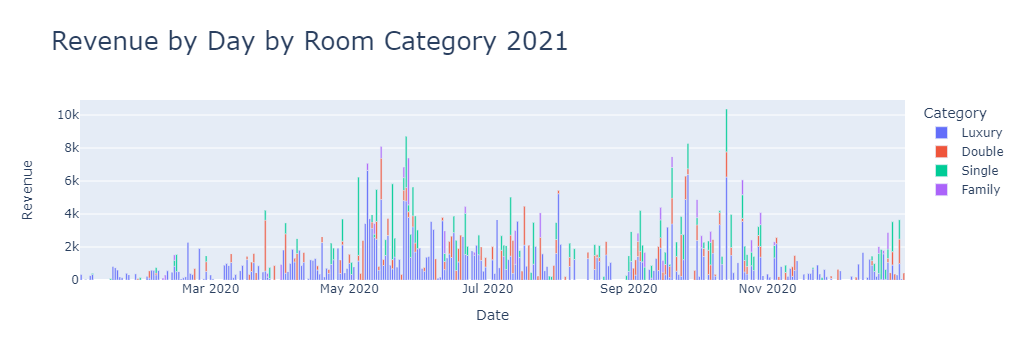

In [17]:
fig4 = px.bar(day, x='Date', y='Revenue', color='Category', title = 'Revenue by Day by Room Category 2021')
fig4.update_layout(title_font_size=25)
fig4.show()

In [130]:
cancellations =pd.read_csv("cancellations.csv")

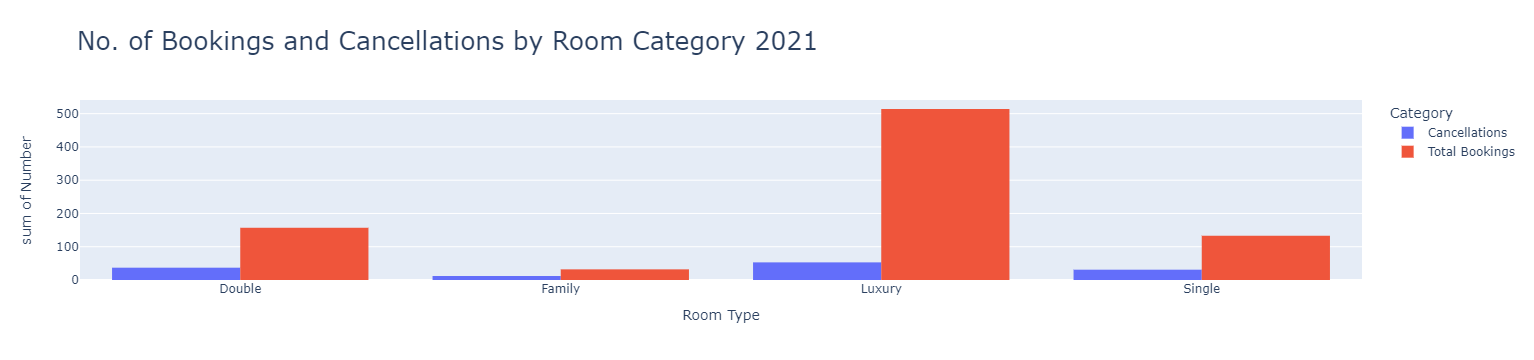

In [131]:
fig5 = px.histogram(cancellations, x='Room Type', y='Number', color='Category', barmode='group', title = 'No. of Bookings and Cancellations by Room Category 2021')
fig5.update_layout(title_font_size=25)
fig5.show()

In [33]:
fig.write_html('lodge-viz.html')

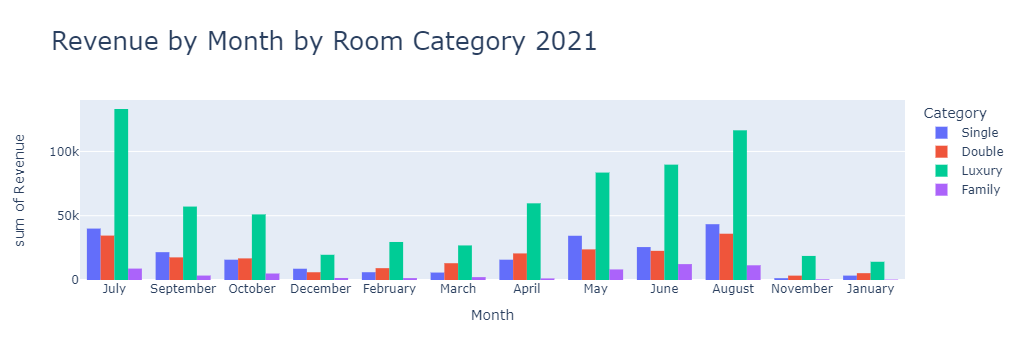

In [18]:
fig6 = px.histogram(lodge, x='Month', y='Revenue', color='Category', barmode='group', title = 'Revenue by Month by Room Category 2021')
fig6.update_layout(title_font_size=25)
fig6.show()

In [66]:
fig2.write_html('lodge-viz.html')

In [20]:
year_rev = pd.read_excel('lodgedata.xlsx', sheet_name='year_rev')

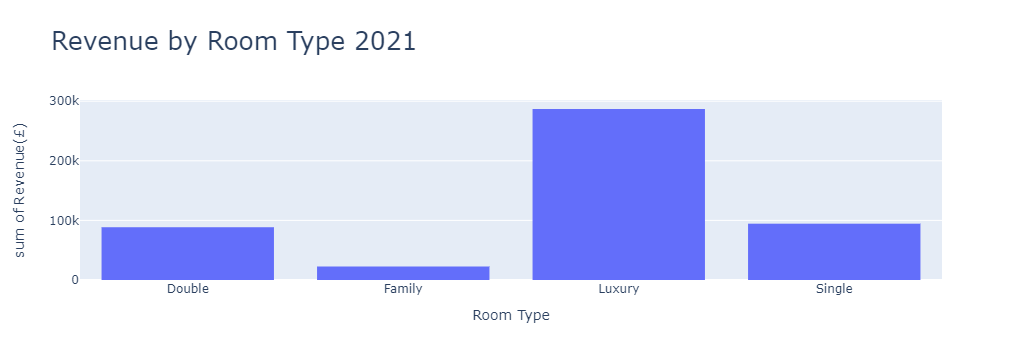

In [21]:
fig7 = px.histogram(year_rev, x='Room Type', y='Revenue(£)', title = 'Revenue by Room Type 2021')
fig7.update_layout(title_font_size=25)
fig7.show()

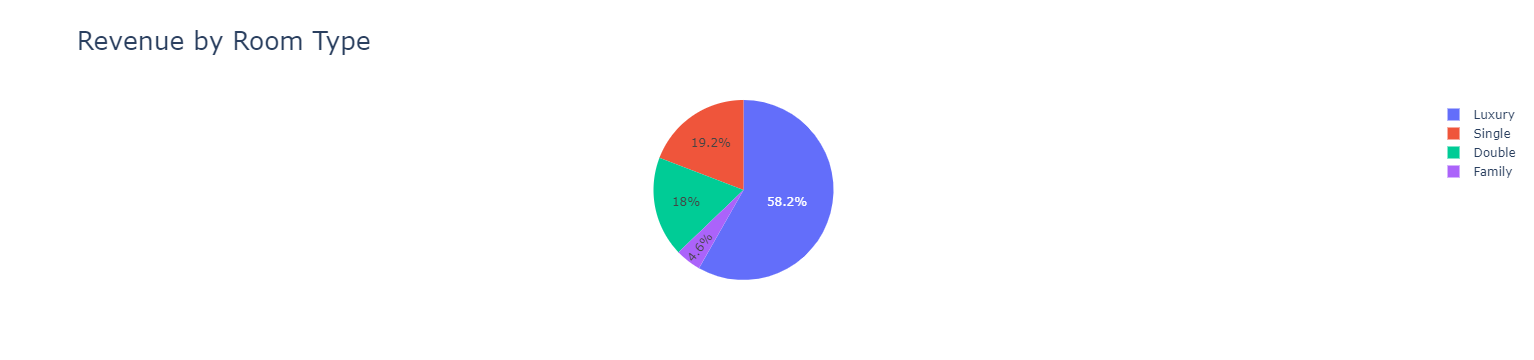

In [132]:
#year_rev.loc[year_rev['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig8 = px.pie(year_rev, values='Revenue(£)', names='Room Type', title='Revenue by Room Type')
fig8.update_layout(title_font_size=25)
fig8.show()

In [28]:
bookings = pd.read_excel('lodgedata.xlsx', sheet_name='bookings')

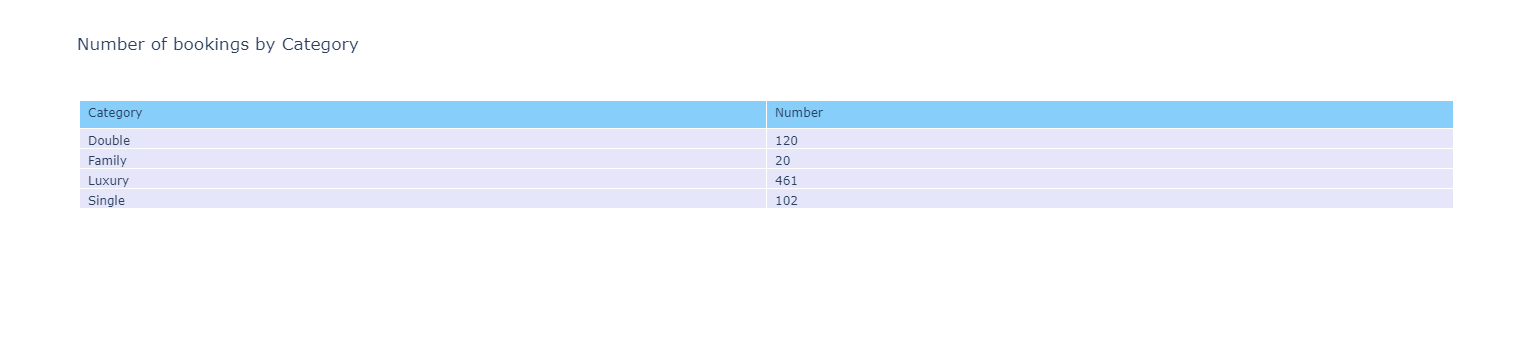

In [108]:
fig9 = go.Figure(data=[go.Table(
    header=dict(values=list(bookings.columns),
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[bookings.Category, bookings.Number],
               fill_color='lavender',
               align='left'))
])
fig9.update_layout(width=350, height=300)
fig9.update_layout(title_text="Number of bookings by Category")
fig9.show()

In [111]:
table = pd.read_excel('lodgedata.xlsx', sheet_name='table')

In [112]:
for col in table.columns:
    print(col)

RoomType
Cancellations
Bookings
Percentage
Revenue


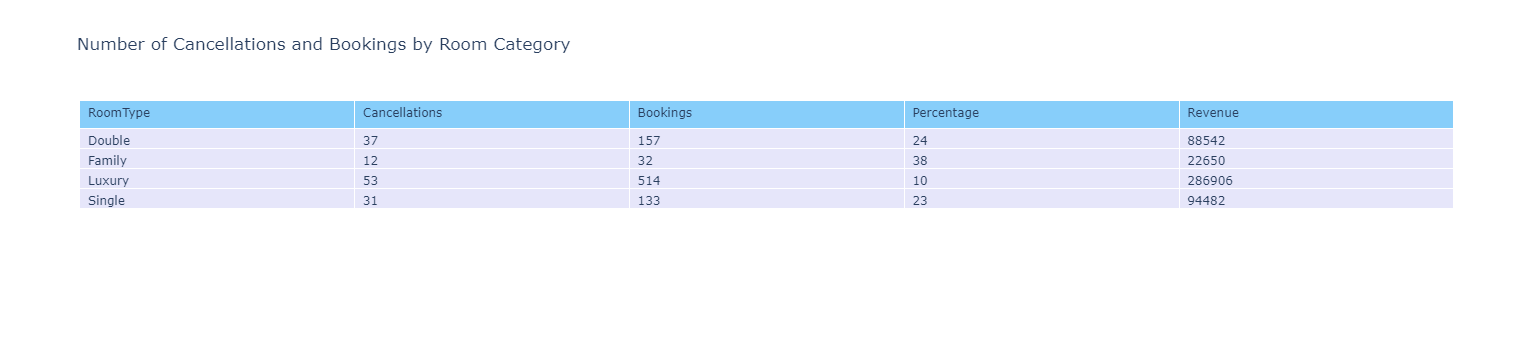

In [113]:
fig10 = go.Figure(data=[go.Table(
    header=dict(values=list(table.columns),
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[table.RoomType, table.Cancellations, table.Bookings, table.Percentage, table.Revenue],
               fill_color='lavender',
               align='left'))
])
fig10.update_layout(width=650, height=300)
fig10.update_layout(title_text="Number of Cancellations and Bookings by Room Category")
fig10.show()

In [122]:
table2 = pd.read_excel('lodgedata.xlsx', sheet_name='table2')
table2.fillna('', inplace=True)
for col in table2.columns:
    print(col)

Month
Cancelled
Check_Out
No_Show
Total
Percentage


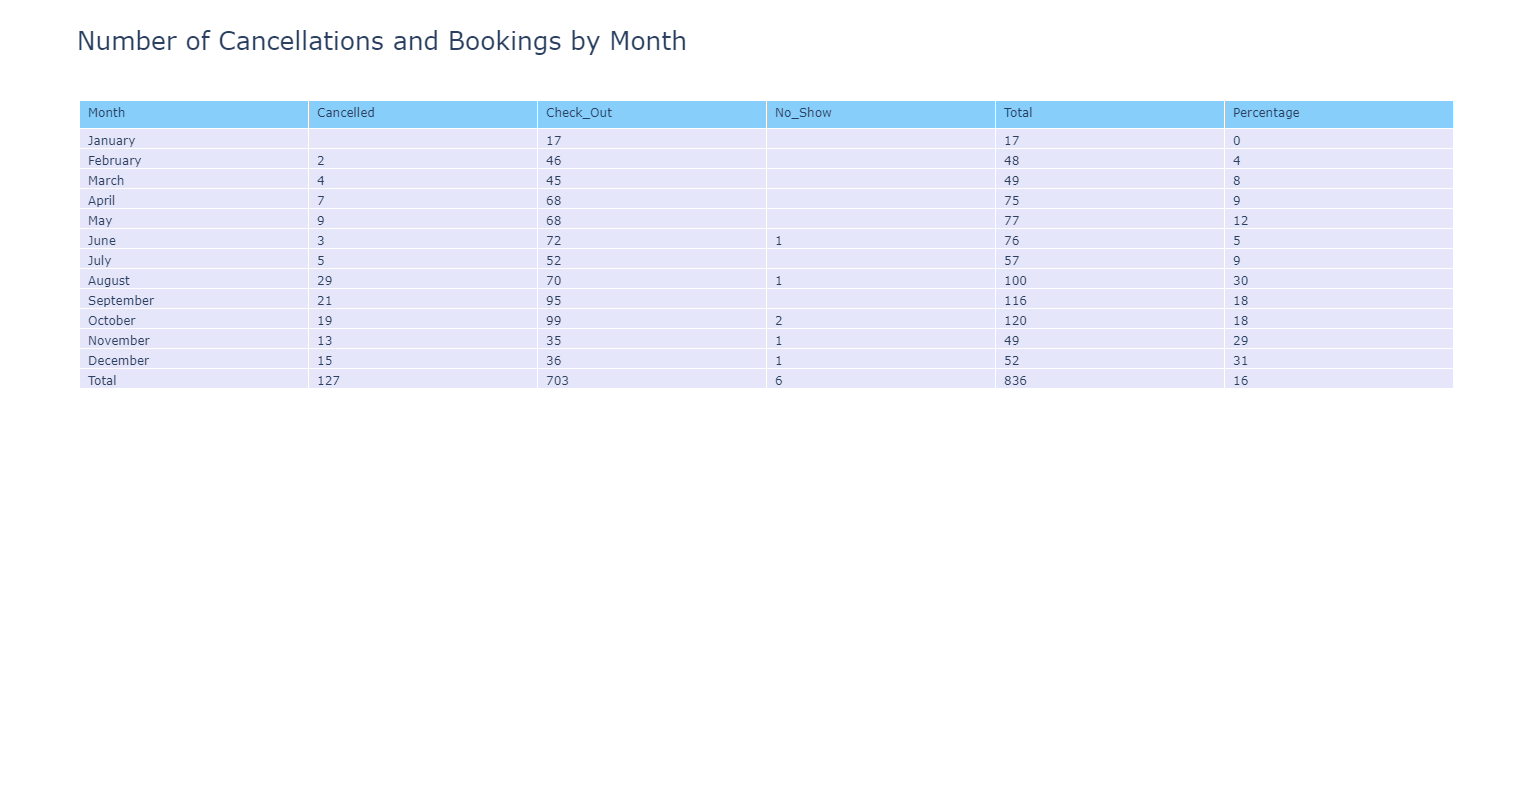

In [134]:
fig11 = go.Figure(data=[go.Table(
    header=dict(values=list(table2.columns),
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[table2.Month, table2.Cancelled, table2.Check_Out, table2.No_Show, table2.Total, table2.Percentage],
               fill_color='lavender',
               align='left'))
])
fig11.update_layout(width=650, height=800)
fig11.update_layout(title_font_size=25)
fig11.update_layout(title_text="Number of Cancellations and Bookings by Month")
fig11.show()

In [56]:
occupancy = pd.read_excel('lodgedata.xlsx', sheet_name='occupancy')

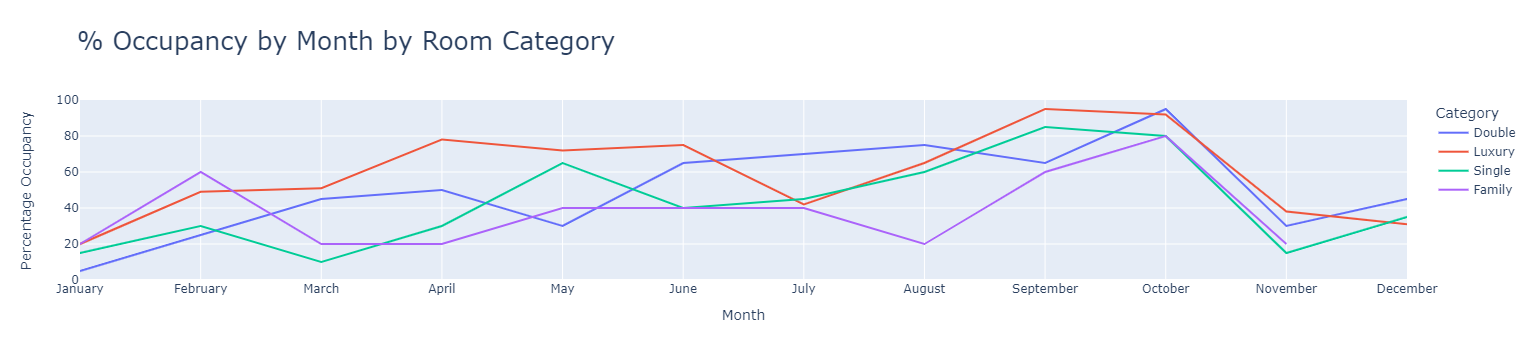

In [125]:
fig12= px.line(occupancy, x='Month', y='Percentage Occupancy', color='Category', title='% Occupancy by Month by Room Category')
fig12.update_layout(title_font_size=25)
fig12.show()

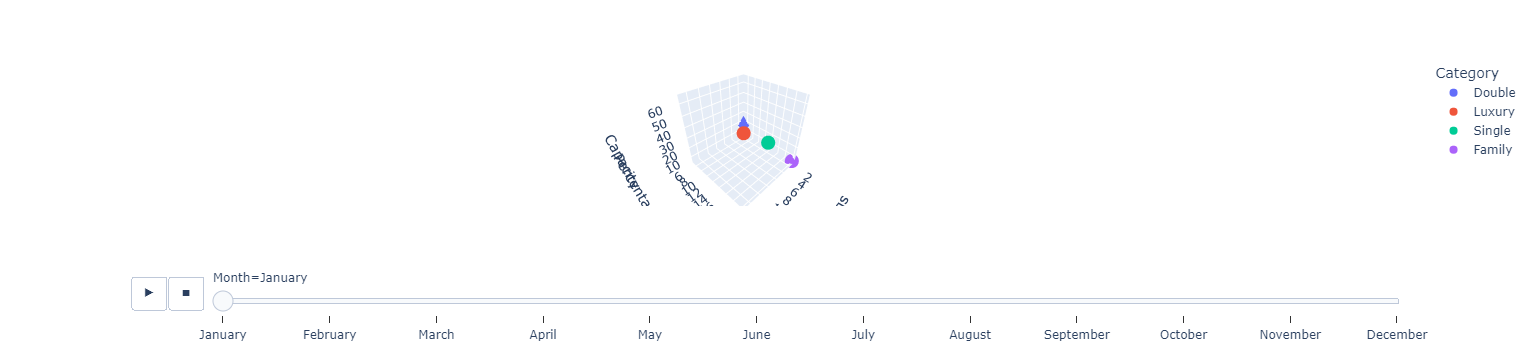

In [126]:
fig13= px.scatter_3d(occupancy, x="Bookings", y="Percentage Occupancy", z="Capacity", color="Category", animation_frame ='Month', animation_group="Category",)
fig13.show()

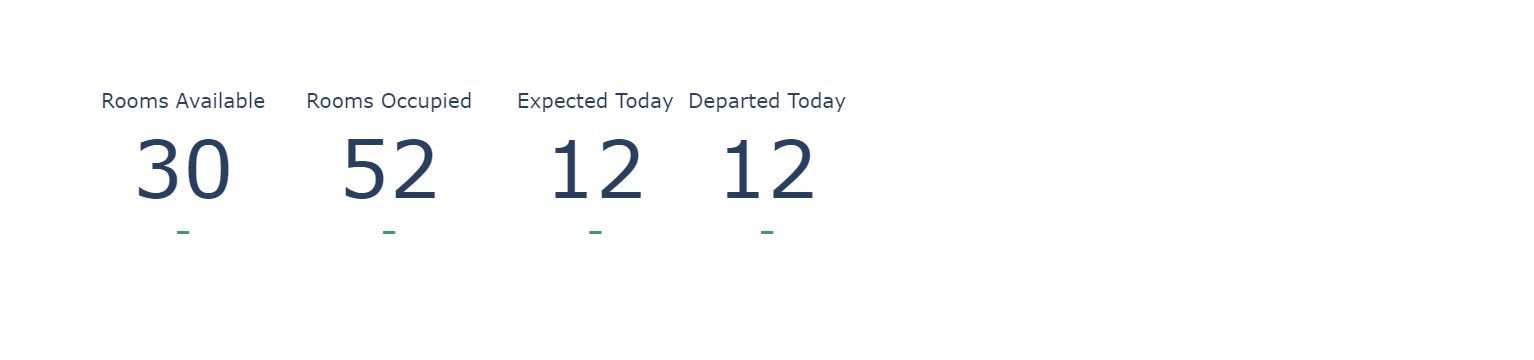

In [127]:
fig14 = go.Figure()

fig14.add_trace(go.Indicator(
    mode = "number+delta",
    value = 30,
    title = {"text": "Rooms Available<br><span style='font-size:0.8em;color:gray'></span><br><span style='font-size:0.8em;color:gray'></span>"},
    #delta = {'reference': 25, 'relative': True},
    domain = {'x': [0, 0.15], 'y': [0, 1]}))

fig14.add_trace(go.Indicator(
    mode = "number+delta",
    value = 52,
    title = {"text": "Rooms Occupied<br><span style='font-size:0.8em;color:gray'></span><br><span style='font-size:0.8em;color:gray'></span>"},
    #delta = {'reference': 26, 'relative': True},
    domain = {'x': [0, 0.45], 'y': [0, 1]}))

fig14.add_trace(go.Indicator(
    mode = "number+delta",
    value = 12,
    title = {"text": "Expected Today<br><span style='font-size:0.8em;color:gray'></span><br><span style='font-size:0.8em;color:gray'></span>"},
    #delta = {'reference': 400, 'relative': True},
    domain = {'x': [0, 0.75], 'y': [0, 1]}))

fig14.add_trace(go.Indicator(
    mode = "number+delta",
    value = 12,
    title = {"text": "Departed Today<br><span style='font-size:0.8em;color:gray'></span><br><span style='font-size:0.8em;color:gray'></span>"},
    #delta = {'reference': 400, 'relative': True},
    domain = {'x': [0, 1.0], 'y': [0, 1]}))


fig14.show()

In [135]:
with open('dashboard.html', 'a') as f:
    f.write(fig14.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig3.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig4.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig8.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig11.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig5.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig13.to_html(full_html=False, include_plotlyjs='cdn'))